https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

* Tensorflow Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# df=pd.read_csv('drive/MyDrive/Colab Notebooks/DATA/cancer_classification.csv')
df=pd.read_csv('cancer_classification.csv')

* Exploratory Data Analysis and Visualization

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

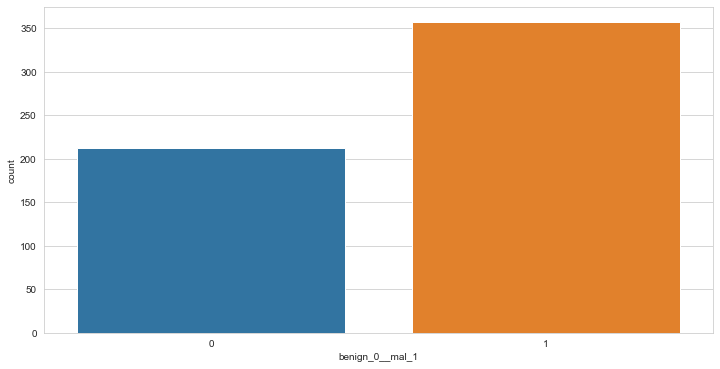

In [7]:
sns.countplot(x=df.benign_0__mal_1);

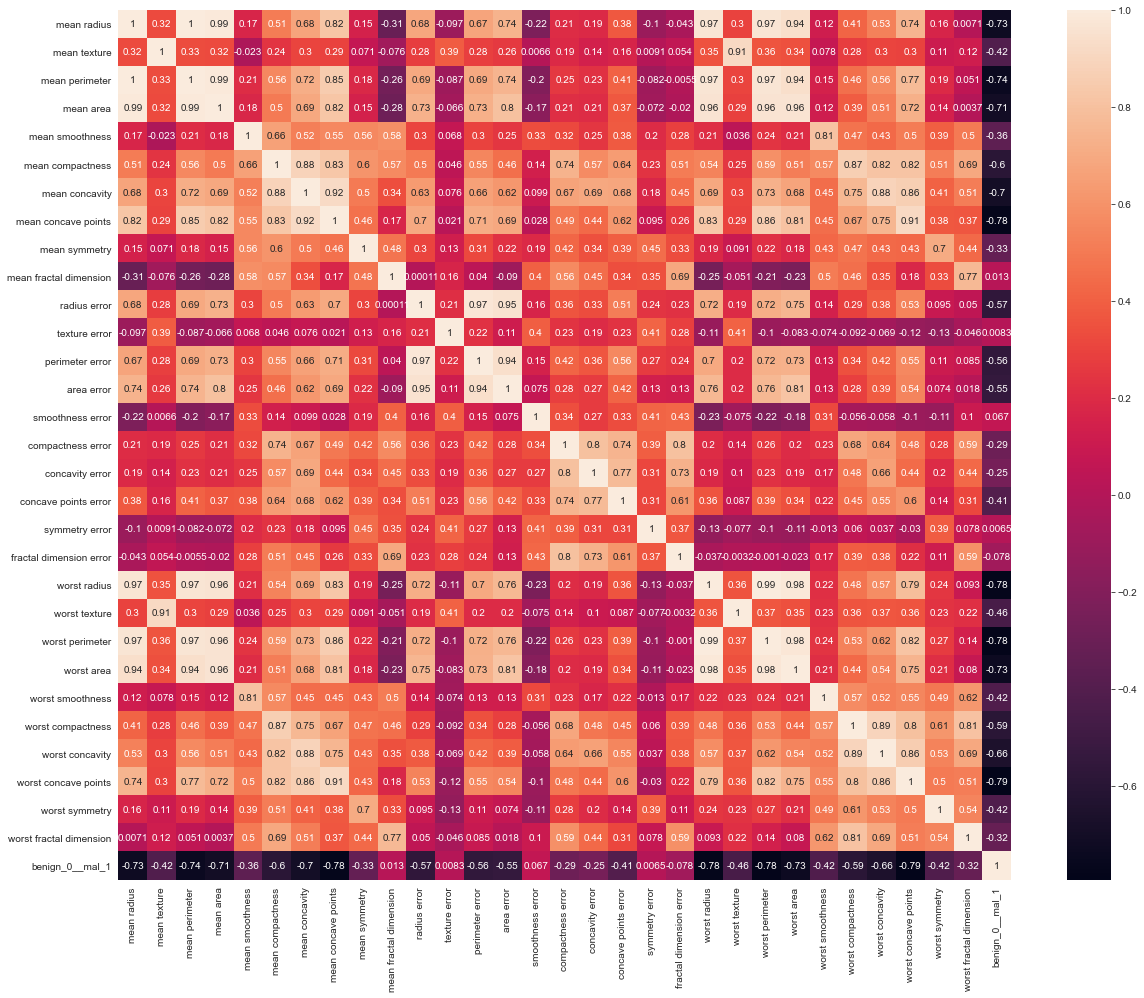

In [8]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True);

* Feature Engineering

In [9]:
drop_list = ["mean area", "mean perimeter", "worst area", "worst perimeter", "perimeter error", "area error"]

In [10]:
df = df.drop(drop_list, axis=1)

In [11]:
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,...,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,...,0.004,24.990,23.410,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,...,0.005,23.570,25.530,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,...,0.009,14.910,26.500,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,...,0.005,22.540,16.670,0.137,0.205,0.400,0.163,0.236,0.077,0


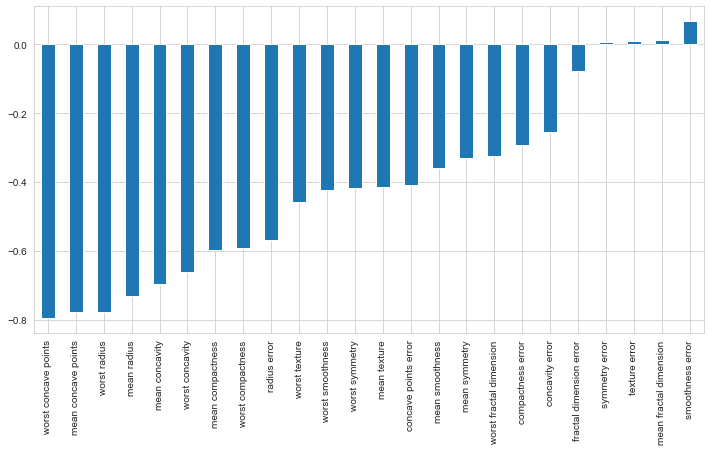

In [12]:
df.corr()["benign_0__mal_1"].sort_values()[:-1].plot(kind="bar");

* Train Test Split

In [13]:
X = df.drop("benign_0__mal_1", axis=1)
y = df.benign_0__mal_1

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

* Creating the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.losses import binary_crossentropy

In [21]:
X_train.shape

(455, 24)

In [22]:
y_train.shape

(455,)

In [23]:
model = Sequential()
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

In [24]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test,y_test), verbose=1)

Epoch 1/500
15/15 [==============================] - 0s 9ms/step - loss: 0.6982 - accuracy: 0.5077 - val_loss: 0.6854 - val_accuracy: 0.7456
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.7429 - val_loss: 0.6705 - val_accuracy: 0.7544
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.7956 - val_loss: 0.6505 - val_accuracy: 0.7807
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.8549 - val_loss: 0.6264 - val_accuracy: 0.8158
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.8571 - val_loss: 0.5984 - val_accuracy: 0.8333
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.8549 - val_loss: 0.5629 - val_accuracy: 0.8596
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.8703 - val_loss: 0.5162 - val_accuracy: 0.8772
Epoch 8/500
1

Epoch 59/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9780 - val_loss: 0.0824 - val_accuracy: 0.9737
Epoch 60/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9758 - val_loss: 0.0806 - val_accuracy: 0.9737
Epoch 61/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9802 - val_loss: 0.0812 - val_accuracy: 0.9737
Epoch 62/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9758 - val_loss: 0.0817 - val_accuracy: 0.9737
Epoch 63/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9802 - val_loss: 0.0805 - val_accuracy: 0.9737
Epoch 64/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9824 - val_loss: 0.0790 - val_accuracy: 0.9737
Epoch 65/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9824 - val_loss: 0.0789 - val_accuracy: 0.9737
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9868 - val_loss: 0.0667 - val_accuracy: 0.9737
Epoch 117/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9758 - val_loss: 0.0650 - val_accuracy: 0.9737
Epoch 118/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9868 - val_loss: 0.0652 - val_accuracy: 0.9737
Epoch 119/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9868 - val_loss: 0.0663 - val_accuracy: 0.9737
Epoch 120/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9890 - val_loss: 0.0658 - val_accuracy: 0.9737
Epoch 121/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9868 - val_loss: 0.0652 - val_accuracy: 0.9737
Epoch 122/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9890 - val_loss: 0.0671 - val_accuracy: 0.9737
Epoch 123/500

15/15 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9890 - val_loss: 0.0656 - val_accuracy: 0.9737
Epoch 174/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9890 - val_loss: 0.0636 - val_accuracy: 0.9649
Epoch 175/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9912 - val_loss: 0.0643 - val_accuracy: 0.9737
Epoch 176/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9912 - val_loss: 0.0690 - val_accuracy: 0.9737
Epoch 177/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9890 - val_loss: 0.0637 - val_accuracy: 0.9737
Epoch 178/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9890 - val_loss: 0.0646 - val_accuracy: 0.9737
Epoch 179/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9890 - val_loss: 0.0644 - val_accuracy: 0.9649
Epoch 180/500

15/15 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9912 - val_loss: 0.0650 - val_accuracy: 0.9737
Epoch 231/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9868 - val_loss: 0.0738 - val_accuracy: 0.9649
Epoch 232/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9934 - val_loss: 0.0667 - val_accuracy: 0.9737
Epoch 233/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9912 - val_loss: 0.0650 - val_accuracy: 0.9737
Epoch 234/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9912 - val_loss: 0.0677 - val_accuracy: 0.9737
Epoch 235/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9912 - val_loss: 0.0692 - val_accuracy: 0.9825
Epoch 236/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0646 - val_accuracy: 0.9737
Epoch 237/500

15/15 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9934 - val_loss: 0.0713 - val_accuracy: 0.9737
Epoch 288/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9912 - val_loss: 0.0753 - val_accuracy: 0.9737
Epoch 289/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9846 - val_loss: 0.0696 - val_accuracy: 0.9737
Epoch 290/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.0757 - val_accuracy: 0.9649
Epoch 291/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9934 - val_loss: 0.0701 - val_accuracy: 0.9737
Epoch 292/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9934 - val_loss: 0.0717 - val_accuracy: 0.9737
Epoch 293/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9934 - val_loss: 0.0786 - val_accuracy: 0.9737
Epoch 294/500

15/15 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.0872 - val_accuracy: 0.9737
Epoch 345/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9934 - val_loss: 0.0775 - val_accuracy: 0.9737
Epoch 346/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9934 - val_loss: 0.0826 - val_accuracy: 0.9649
Epoch 347/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.0834 - val_accuracy: 0.9649
Epoch 348/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0799 - val_accuracy: 0.9649
Epoch 349/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0828 - val_accuracy: 0.9737
Epoch 350/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0801 - val_accuracy: 0.9649
Epoch 351/500

15/15 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9934 - val_loss: 0.0901 - val_accuracy: 0.9649
Epoch 402/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9934 - val_loss: 0.0849 - val_accuracy: 0.9649
Epoch 403/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9912 - val_loss: 0.0930 - val_accuracy: 0.9649
Epoch 404/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0887 - val_accuracy: 0.9649
Epoch 405/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.0864 - val_accuracy: 0.9649
Epoch 406/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9934 - val_loss: 0.0901 - val_accuracy: 0.9649
Epoch 407/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.0900 - val_accuracy: 0.9649
Epoch 408/500

15/15 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9934 - val_loss: 0.1047 - val_accuracy: 0.9649
Epoch 459/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9934 - val_loss: 0.0981 - val_accuracy: 0.9649
Epoch 460/500
15/15 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9934 - val_loss: 0.1017 - val_accuracy: 0.9649
Epoch 461/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9912 - val_loss: 0.0928 - val_accuracy: 0.9649
Epoch 462/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9912 - val_loss: 0.1358 - val_accuracy: 0.9474
Epoch 463/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0988 - val_accuracy: 0.9649
Epoch 464/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9934 - val_loss: 0.0966 - val_accuracy: 0.9649
Epoch 465/500

In [25]:
model_losses=pd.DataFrame(model.history.history)
model_losses

,loss,accuracy,val_loss,val_accuracy
0,0.698,0.508,0.685,0.746
1,0.680,0.743,0.670,0.754
2,0.665,0.796,0.651,0.781
3,0.645,0.855,0.626,0.816
4,0.622,0.857,0.598,0.833
...,...,...,...,...
495,0.013,0.996,0.111,0.965
496,0.012,0.998,0.107,0.965
497,0.012,0.996,0.117,0.965
498,0.013,0.996,0.107,0.965


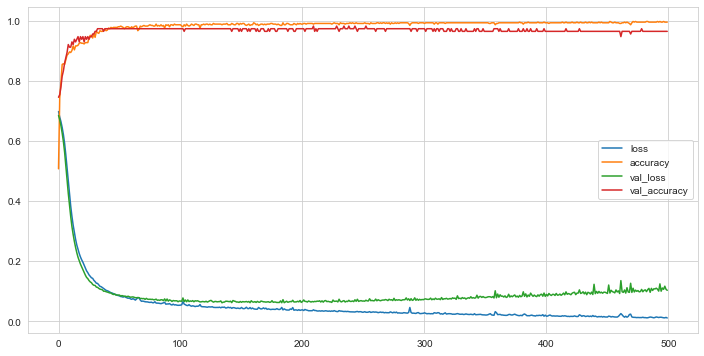

In [26]:
model_losses.plot();

* Early Stopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
model = Sequential()
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

In [29]:
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [30]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=15)

In [31]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test,y_test), verbose=1, callbacks=early_stop)

Epoch 1/500
15/15 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.5626 - val_loss: 0.6523 - val_accuracy: 0.7632
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.8308 - val_loss: 0.6160 - val_accuracy: 0.8509
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.8857 - val_loss: 0.5768 - val_accuracy: 0.8421
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.8725 - val_loss: 0.5349 - val_accuracy: 0.8860
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.9011 - val_loss: 0.4899 - val_accuracy: 0.8947
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.8967 - val_loss: 0.4397 - val_accuracy: 0.9035
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.9033 - val_loss: 0.3921 - val_accuracy: 0.9123
Epoch 8/500
1

Epoch 59/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9868 - val_loss: 0.0703 - val_accuracy: 0.9737
Epoch 60/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9912 - val_loss: 0.0754 - val_accuracy: 0.9737
Epoch 61/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9780 - val_loss: 0.0681 - val_accuracy: 0.9737
Epoch 62/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9824 - val_loss: 0.0720 - val_accuracy: 0.9737
Epoch 63/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9868 - val_loss: 0.0677 - val_accuracy: 0.9737
Epoch 64/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9868 - val_loss: 0.0692 - val_accuracy: 0.9737
Epoch 65/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9868 - val_loss: 0.0684 - val_accuracy: 0.9737
Epoch 

15/15 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9934 - val_loss: 0.0630 - val_accuracy: 0.9737
Epoch 117/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9934 - val_loss: 0.0659 - val_accuracy: 0.9737
Epoch 118/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9890 - val_loss: 0.0624 - val_accuracy: 0.9649
Epoch 119/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9934 - val_loss: 0.0645 - val_accuracy: 0.9737
Epoch 120/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9890 - val_loss: 0.0634 - val_accuracy: 0.9737
Epoch 121/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9934 - val_loss: 0.0653 - val_accuracy: 0.9737
Epoch 122/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9890 - val_loss: 0.0639 - val_accuracy: 0.9737
Epoch 123/500

In [32]:
model_losses=pd.DataFrame(model.history.history)
model_losses

,loss,accuracy,val_loss,val_accuracy
0,0.670,0.563,0.652,0.763
1,0.640,0.831,0.616,0.851
2,0.602,0.886,0.577,0.842
3,0.565,0.873,0.535,0.886
4,0.524,0.901,0.490,0.895
...,...,...,...,...
139,0.034,0.991,0.065,0.974
140,0.034,0.993,0.065,0.974
141,0.033,0.991,0.066,0.974
142,0.035,0.989,0.065,0.974


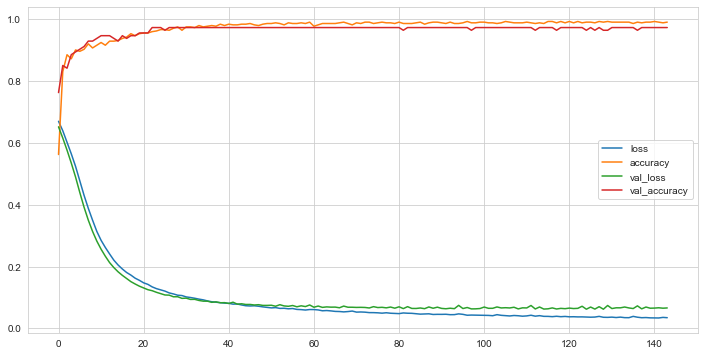

In [33]:
model_losses.plot();

* Dropout Layers

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
model = Sequential()

model.add(Dense(24, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

In [36]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test,y_test), verbose=1, callbacks=early_stop)

Epoch 1/500
15/15 [==============================] - 0s 8ms/step - loss: 0.7840 - accuracy: 0.4747 - val_loss: 0.7169 - val_accuracy: 0.3772
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5187 - val_loss: 0.6843 - val_accuracy: 0.3860
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5560 - val_loss: 0.6611 - val_accuracy: 0.7193
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5648 - val_loss: 0.6447 - val_accuracy: 0.8596
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6308 - val_loss: 0.6247 - val_accuracy: 0.7982
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6703 - val_loss: 0.6053 - val_accuracy: 0.7982
Epoch 7/500
15/15 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6967 - val_loss: 0.5792 - val_accuracy: 0.8246
Epoch 8/500
1

Epoch 59/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9275 - val_loss: 0.0937 - val_accuracy: 0.9649
Epoch 60/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9385 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 61/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9451 - val_loss: 0.0930 - val_accuracy: 0.9737
Epoch 62/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9429 - val_loss: 0.0921 - val_accuracy: 0.9737
Epoch 63/500
15/15 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.9385 - val_loss: 0.0912 - val_accuracy: 0.9737
Epoch 64/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9516 - val_loss: 0.0877 - val_accuracy: 0.9737
Epoch 65/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9385 - val_loss: 0.0879 - val_accuracy: 0.9737
Epoch 

In [37]:
model_losses=pd.DataFrame(model.history.history)
model_losses

,loss,accuracy,val_loss,val_accuracy
0,0.784,0.475,0.717,0.377
1,0.699,0.519,0.684,0.386
2,0.690,0.556,0.661,0.719
3,0.681,0.565,0.645,0.860
4,0.656,0.631,0.625,0.798
...,...,...,...,...
91,0.135,0.952,0.078,0.965
92,0.135,0.954,0.081,0.974
93,0.153,0.958,0.078,0.965
94,0.119,0.958,0.079,0.974


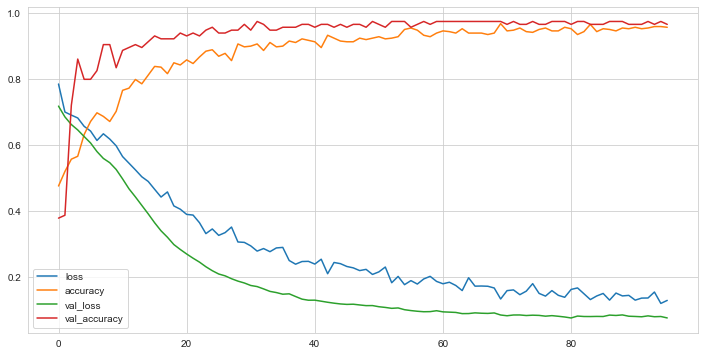

In [38]:
model_losses.plot();

* Model Evaluation

In [39]:
y_pred = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(confusion_matrix(y_test, y_pred))

[[41  2]
 [ 2 69]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



* Making Predictions

In [43]:
df.head(2)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,...,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,...,0.004,24.990,23.410,0.124,0.187,0.242,0.186,0.275,0.089,0


In [45]:
df.shape

(569, 25)

In [46]:
new_data = df.iloc[0][:-1]

In [47]:
new_data1=df.iloc[1][:-1]

In [48]:
new_data.shape

(24,)

In [49]:
new_data.ndim

1

In [50]:
X_train.ndim

2

In [51]:
X_train.shape

(455, 24)

In [52]:
X_test.shape

(114, 24)

In [53]:
a = new_data.values.reshape(-1,24)

In [54]:
a.shape

(1, 24)

In [55]:
new_data = scaler.transform(new_data.values.reshape(-1,24))

In [56]:
new_data1 = scaler.transform(new_data1.values.reshape(-1,24))

In [57]:
model.predict_classes(new_data)

array([[0]])

In [58]:
model.predict_classes(new_data1)

array([[0]])

* Comparison with ML

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[40  3]
 [ 2 69]]


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

